In [74]:
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

from tqdm import tqdm
from random import randint
from tqdm import tqdm
import time
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

import sys
#sys.path.append()
from KGB import preprocess_df, proceed_KGB


plt.rcParams["figure.figsize"] = (12, 9)
warnings.simplefilter("ignore")

In [45]:
current_dataset = 6
name_directory = "CTU-13-Dataset"
path = os.path.join(name_directory,str(current_dataset))
os.listdir(path)

['botnet-capture-20110816-donbot.pcap', 'capture20110816.binetflow', 'README']

In [46]:
datafile_name = [i for i in os.listdir(path) if i.endswith(".binetflow") ][0]
df = pd.read_csv(os.path.join(path,datafile_name))
df = preprocess_df(df)
df

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Backgroung_label,Normal_label,Botnet_label
24,2011-08-16 10:01:46.972101,3599.986572,tcp,88.176.79.163,49213,<?>,147.32.84.172,18250,A_PA,0.0,0.0,414671,415389446,10150692,flow=Background,True,False,False
25,2011-08-16 10:01:46.974947,320.268677,tcp,147.32.85.112,22,<?>,85.70.14.207,10005,FPA_FPA,0.0,0.0,31989,7744510,6056438,flow=Background,True,False,False
26,2011-08-16 10:01:46.976831,0.000467,udp,90.178.10.8,61997,<->,147.32.84.229,13363,CON,0.0,0.0,2,236,174,flow=Background-UDP-Established,True,False,False
27,2011-08-16 10:01:46.977232,0.009599,tcp,117.211.100.130,43458,?>,147.32.86.92,80,RA_,0.0,NaN,4,264,264,flow=Background,True,False,False
28,2011-08-16 10:01:46.979356,3599.942383,tcp,88.176.79.163,49375,<?>,147.32.84.172,46696,A_PA,0.0,0.0,471746,473057124,11502112,flow=Background,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558914,2011-08-16 12:10:56.783227,0.000241,udp,147.32.84.59,47132,<->,147.32.80.9,53,CON,0.0,0.0,2,230,90,flow=To-Background-UDP-CVUT-DNS-Server,True,False,False
558915,2011-08-16 12:10:56.783863,0.000360,udp,147.32.84.59,33462,<->,147.32.80.9,53,CON,0.0,0.0,2,307,86,flow=To-Background-UDP-CVUT-DNS-Server,True,False,False
558916,2011-08-16 12:10:56.783922,0.000419,udp,147.32.84.59,50059,<->,147.32.80.9,53,CON,0.0,0.0,2,254,77,flow=To-Background-UDP-CVUT-DNS-Server,True,False,False
558917,2011-08-16 12:10:56.802376,0.041333,tcp,84.42.129.253,33357,->,147.32.84.36,443,SPA_SPA,0.0,0.0,15,6824,1142,flow=Background-TCP-Established,True,False,False


In [47]:
list_botnets = list(df[df.Label.str.contains("Botnet")].SrcAddr.unique())

In [48]:
proceed_KGB(df,anomaly_threshold =  2000 ) 

147.32.84.138    3424.410330
147.32.84.170    2503.971761
147.32.84.59     5150.343070
147.32.86.20     2061.163110
147.32.86.223    2009.644193
dtype: float64

In [49]:
df[df.SrcAddr.isin(list_botnets)] # c'est l'attaquant

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Backgroung_label,Normal_label,Botnet_label
2909,2011-08-16 10:02:08.703460,0.167688,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,505,78,flow=From-Botnet-V47-UDP-DNS,False,False,True
2935,2011-08-16 10:02:08.872739,500.003357,tcp,147.32.84.165,1039,->,195.113.232.73,80,SPA_FSPA,0.0,0.0,14,5498,531,flow=From-Botnet-V47-TCP-Established-HTTP-Ad-4,False,False,True
39074,2011-08-16 10:09:58.055700,1.896288,tcp,147.32.84.165,1040,->,91.212.135.158,5678,FSPA_FSPA,0.0,0.0,1417,1255401,32823,flow=From-Botnet-V47-TCP-CC73-Not-Encrypted,False,False,True
39197,2011-08-16 10:09:59.890489,0.147772,udp,147.32.84.165,1041,<->,147.32.80.9,53,CON,0.0,0.0,2,229,88,flow=From-Botnet-V47-UDP-DNS,False,False,True
39212,2011-08-16 10:10:00.039348,0.000391,udp,147.32.84.165,1042,<->,147.32.80.9,53,CON,0.0,0.0,2,326,86,flow=From-Botnet-V47-UDP-DNS,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554753,2011-08-16 12:10:08.795607,2.942743,tcp,147.32.84.165,4856,->,220.225.80.179,25,S_,0.0,NaN,2,124,124,flow=From-Botnet-V47-TCP-Attempt-SPAM,False,False,True
554754,2011-08-16 12:10:08.795910,2.942500,tcp,147.32.84.165,4857,->,67.231.152.94,25,S_,0.0,NaN,2,124,124,flow=From-Botnet-V47-TCP-Attempt-SPAM,False,False,True
554755,2011-08-16 12:10:08.796217,2.942256,tcp,147.32.84.165,4858,->,24.71.223.11,25,S_,0.0,NaN,2,124,124,flow=From-Botnet-V47-TCP-Attempt-SPAM,False,False,True
554756,2011-08-16 12:10:08.796508,2.942027,tcp,147.32.84.165,4859,->,89.6.186.79,25,S_,0.0,NaN,2,124,124,flow=From-Botnet-V47-TCP-Attempt-SPAM,False,False,True


In [50]:
#"147.32.84.165"
end = pd.to_datetime("2011-08-16 12:10:15.643807")
cutted = df[df.StartTime<= end]
proceed_KGB(cutted,  anomaly_threshold = 1500 ) 

147.32.84.138    3788.001728
147.32.84.165    2401.262082
147.32.84.170    2394.102545
147.32.84.229    1581.802007
147.32.84.59     5499.569479
147.32.85.25     2006.346081
147.32.85.34     1863.057186
147.32.86.187    1911.690136
147.32.86.20     2279.569335
147.32.86.223    1547.398121
dtype: float64

In [51]:
window = 5

In [52]:
window = 5

def compute_anomalies_scores_for_windows(df, window = window, step = 1) : 


    window_delta = pd.Timedelta(window, "m")
    min_time = df.StartTime.iloc[0]
    max_time = df.StartTime.iloc[-1]
    duration = max_time-min_time - window_delta
    number_of_iterations = int(duration.total_seconds() / (step*60))


    res = []
    for i in tqdm(range(number_of_iterations)) :
        time_of_end = min_time + window_delta + pd.Timedelta(step*i, "m")
        cutted = df[df.StartTime<= time_of_end ]
        res.append(proceed_KGB(cutted, window_time = window ) )
        
    new_res = [pd.DataFrame( {"anomaly_score" : df, "id_time_frame" : id_df}) for id_df, df in enumerate(res)]
    result = pd.concat(new_res)
    
    return result    

    
result = compute_anomalies_scores_for_windows(df, window = 5, step = 1)
result

100%|████████████████████████████████████████████████████████████████████████████████| 124/124 [08:07<00:00,  3.93s/it]


,anomaly_score,id_time_frame
0.0.0.0,0.0,0
00:15:17:2c:e5:2d,0.0,0
1.112.86.136,0.0,0
1.144.122.213,0.0,0
1.148.31.101,0.0,0
...,...,...
99.75.120.18,0.0,123
99.89.242.116,0.0,123
99.90.230.61,0.0,123
fe80::5054:ff:fe89:354,0.0,123


# Label

In [53]:

def label_data(df, list_botnets) :
    labels = []
    for index, row in tqdm(df.iterrows()) :
        labels.append(index in list_botnets)
    df["IP_src"] = df.index
    df["label"] = labels
    
    return df.sort_values("anomaly_score", ascending=False, inplace = False)
    
labelled_res =  label_data(result, list_botnets)
labelled_res

496770it [00:14, 33979.19it/s]


,anomaly_score,id_time_frame,IP_src,label
147.32.84.59,8181.006081,3,147.32.84.59,False
147.32.84.59,8056.979397,0,147.32.84.59,False
147.32.84.59,8028.629142,1,147.32.84.59,False
147.32.84.59,7932.005016,2,147.32.84.59,False
147.32.84.59,7484.108500,4,147.32.84.59,False
...,...,...,...,...
193.107.53.25,0.000000,38,193.107.53.25,False
193.107.227.168,0.000000,38,193.107.227.168,False
192.38.226.62,0.000000,38,192.38.226.62,False
192.35.17.21,0.000000,38,192.35.17.21,False


In [54]:
whitelist = ["147.32.84.59", "147.32.84.138"]
labelled_res[~labelled_res.IP_src.isin(whitelist)]

,anomaly_score,id_time_frame,IP_src,label
147.32.85.76,3590.615341,16,147.32.85.76,False
147.32.85.76,3520.367003,15,147.32.85.76,False
147.32.86.20,3351.864734,3,147.32.86.20,False
147.32.86.165,3309.772016,0,147.32.86.165,False
147.32.86.20,3278.494118,2,147.32.86.20,False
...,...,...,...,...
193.107.53.25,0.000000,38,193.107.53.25,False
193.107.227.168,0.000000,38,193.107.227.168,False
192.38.226.62,0.000000,38,192.38.226.62,False
192.35.17.21,0.000000,38,192.35.17.21,False


In [56]:
labelled_res[labelled_res.label==1].anomaly_score.describe()

count     121.000000
mean     1763.373840
std       521.931746
min        10.426365
25%      1466.991357
50%      1693.160450
75%      2078.794528
max      2913.176999
Name: anomaly_score, dtype: float64

Text(0.5, 1.0, 'Anomaly Score Distribution')

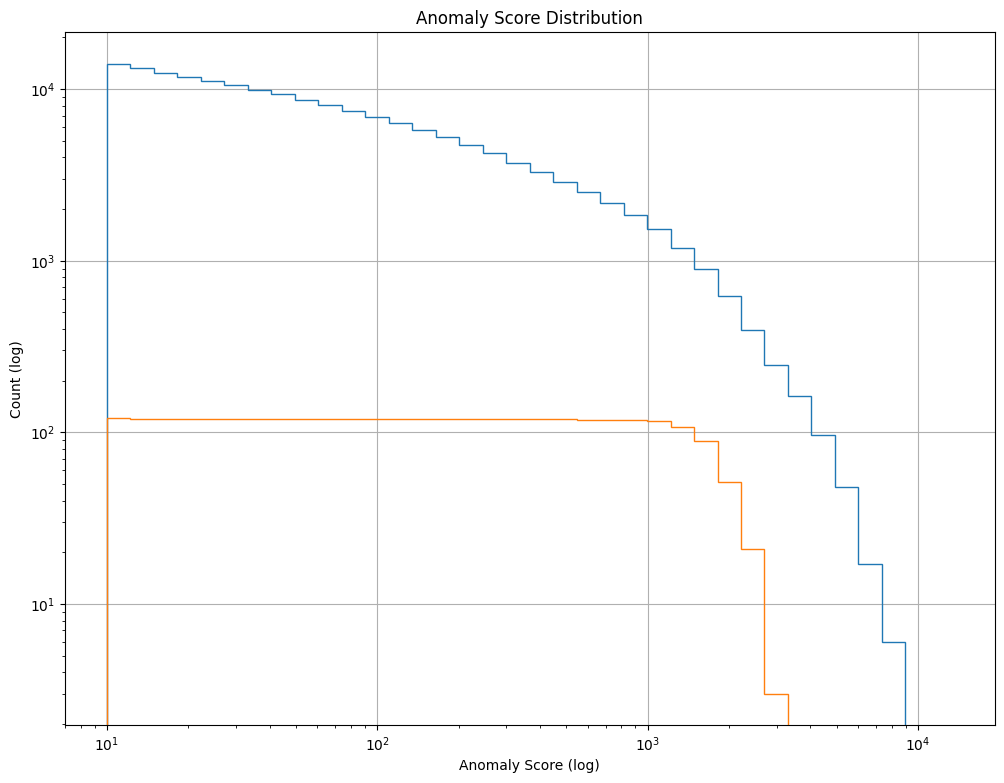

In [77]:
bins = 10*np.exp(np.arange(0,7.4,0.2))
f, ax = plt.subplots()
only_botnet = labelled_res[labelled_res.label==1]

labelled_res.hist(column = "anomaly_score",bins = bins, ax = ax,  histtype='step', cumulative=-1)
only_botnet.hist(column = "anomaly_score",bins = bins, ax = ax,  histtype='step', cumulative=-1)
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylabel("Count (log)")
plt.xlabel("Anomaly Score (log)")
plt.title("Anomaly Score Distribution")

# Logistic Regression

In [78]:
X = labelled_res.anomaly_score.values.reshape(-1, 1)
Y = labelled_res.label

clf = LogisticRegression(class_weight="balanced")
clf.fit(X, Y)
clf.coef_, clf.intercept_

(array([[0.00705503]]), array([-3.94749461]))

In [79]:
clf = LogisticRegression(random_state=4242)
clf.fit(X, Y)
clf.coef_, clf.intercept_

(array([[0.00150698]]), array([-8.71630139]))

# Gradient descent

In [80]:
def compute_metrics(data,threshold, window = 5, consider_window_correc = False) :
    #don't know if we have to consider the entire df
    
    if consider_window_correc :
        alpha = 0.01
        correc_func = np.exp(-alpha * window)+1
    else :
        correc_func = 1
        
    
    tTP= []
    tTN = []
    tFP = []
    tFN = []
    
    for time_frame in data.id_time_frame.unique() :
        current_time_frame = data[data.id_time_frame==time_frame]
        ##counts_ip_src.set_index = current_time_frame.groupby("IP_src").agg({"label":"mean"})
        #print(current_time_frame.IP_src.value_counts())
        counts_ip_src = current_time_frame.set_index("IP_src") #already aggregated
        #print(counts_ip_src)
        count_unik_botnet = len(current_time_frame[current_time_frame.label==1])
        count_unik_not_botnet = len(current_time_frame[current_time_frame.label==0])
    
        c_TP = counts_ip_src[(counts_ip_src.label==1) & (counts_ip_src.anomaly_score>threshold)]
        c_TN = counts_ip_src[(counts_ip_src.label==0) & (counts_ip_src.anomaly_score<=threshold)]
        c_FP = counts_ip_src[(counts_ip_src.label==0) & (counts_ip_src.anomaly_score>threshold)]
        c_FN = counts_ip_src[(counts_ip_src.label==1) & (counts_ip_src.anomaly_score<=threshold)]
        """print(c_TP, 2*"\n")
        print(c_TN, 2*"\n")
        print(c_FP, 2*"\n")
        print(c_FN, 2*"\n")
        break"""
        if count_unik_botnet>0 : 
            
            cur_tTP = len(c_TP)*correc_func/count_unik_botnet
            cur_tFN = len(c_FN)*correc_func/count_unik_botnet
            tTP.append(cur_tTP)
            tFN.append(cur_tFN)

              
        if count_unik_not_botnet > 0 :
            cur_tTN = len(c_TN)/count_unik_not_botnet
            cur_tFP = len(c_FP)/count_unik_not_botnet
            tTN.append(cur_tTN)
            tFP.append(cur_tFP)
         
    
    tTP = np.mean(tTP)
    tTN = np.mean(tTN)
    tFP = np.mean(tFP)
    tFN = np.mean(tFN)
    
    
    
    TPR = tTP/(tTP+tFN)
    TNR = tTN/(tTN+tFP)
    FPR = tFP/(tTN+tFP)
    FNR = tFN/(tTP+tFN)
    Prec = tTP/(tTP+tFP)
    Acc = (tTP+tTN)/(tTP+tTN+tFP+tFN)
    ErrR = (tFN+tFP)/(tTP+tTN+tFP+tFN)
    FM1 = 2*(Prec*TPR)/(Prec+TPR)
    metrics = {"tTP":tTP,"tTN": tTN,"tFP":tFP,"tFN":tFN,"TPR" : TPR, "TNR":TNR,"FPR":FPR,"FNR":FNR, "Prec":Prec,
              "Acc":Acc, "ErrR":ErrR, "FM1":FM1}
    return metrics
    
    

metrics = compute_metrics(labelled_res,10,window = window )  
    
metrics  

{'tTP': 1.0,
 'tTN': 0.9718600441288933,
 'tFP': 0.02813995587110653,
 'tFN': 0.0,
 'TPR': 1.0,
 'TNR': 0.9718600441288935,
 'FPR': 0.028139955871106535,
 'FNR': 0.0,
 'Prec': 0.972630228296823,
 'Acc': 0.9859300220644467,
 'ErrR': 0.014069977935553264,
 'FM1': 0.9861252396366206}

100%|████████████████████████████████████████████████████████████████████████████████| 520/520 [04:23<00:00,  1.97it/s]


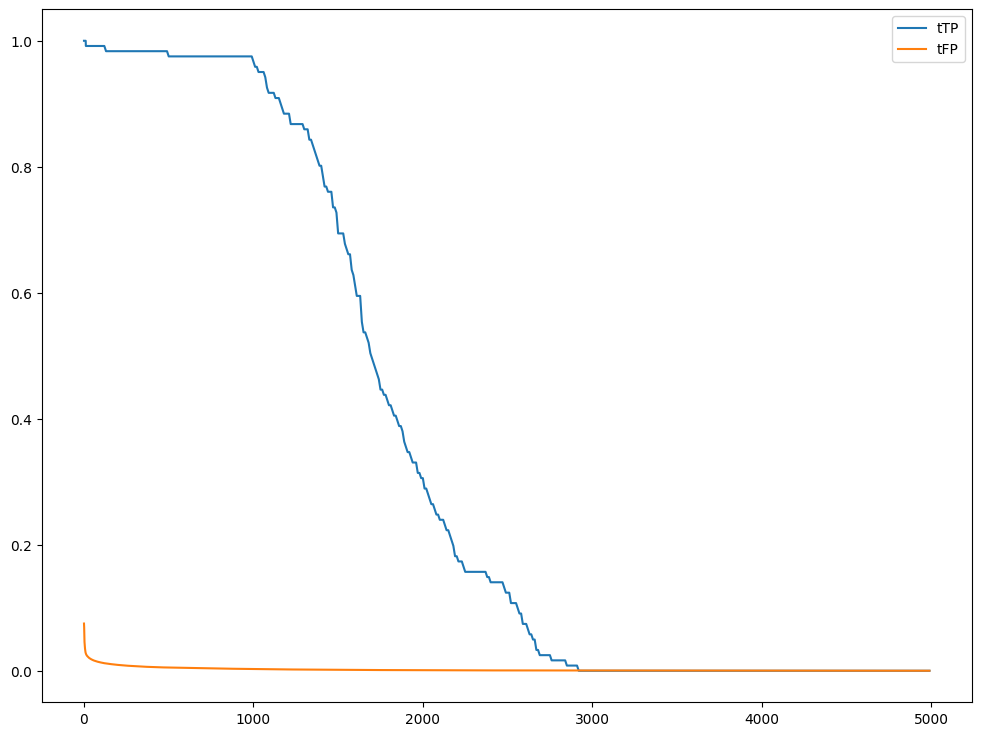

In [81]:
losses = []
list_metrics = []
thresholds = list(range(20)) +list(range(30,60,5)) +  list(range(60,5000,10))
for i in tqdm(thresholds):
    metrics = compute_metrics(labelled_res,i)   
    list_metrics.append(metrics)
    #losses.append(loss_perso(metrics) )

    
legend = ['tTP','tFP' ]
plt.plot(thresholds,[i[legend[0]] for i in list_metrics])
plt.plot(thresholds,[i[legend[1]] for i in list_metrics])
plt.legend(legend)

In [89]:

metrics_df = pd.DataFrame.from_records(list_metrics)
metrics_df.rename(columns = {"tTP":"TP", "tTN":"TN", "tFP":"FP", "tFN":"FN"}, inplace = True)
metrics_df["thresholds"] = thresholds
selected = metrics_df[metrics_df.FP<0.0105]
selected.sort_values(by = ["TP", "thresholds"], ascending = [False, True]).head(15)

,TP,TN,FP,FN,TPR,TNR,FPR,FNR,Prec,Acc,ErrR,FM1,thresholds
37,0.983471,0.989803,0.010197,0.016529,0.983471,0.989803,0.010197,0.016529,0.989738,0.986637,0.013363,0.986595,170
38,0.983471,0.990107,0.009893,0.016529,0.983471,0.990107,0.009893,0.016529,0.990041,0.986789,0.013211,0.986745,180
39,0.983471,0.990395,0.009605,0.016529,0.983471,0.990395,0.009605,0.016529,0.990328,0.986933,0.013067,0.986887,190
40,0.983471,0.990678,0.009322,0.016529,0.983471,0.990678,0.009322,0.016529,0.990610,0.987074,0.012926,0.987028,200
41,0.983471,0.990924,0.009076,0.016529,0.983471,0.990924,0.009076,0.016529,0.990856,0.987197,0.012803,0.987150,210
42,0.983471,0.991144,0.008856,0.016529,0.983471,0.991144,0.008856,0.016529,0.991075,0.987307,0.012693,0.987258,220
43,0.983471,0.991352,0.008648,0.016529,0.983471,0.991352,0.008648,0.016529,0.991283,0.987411,0.012589,0.987362,230
44,0.983471,0.991586,0.008414,0.016529,0.983471,0.991586,0.008414,0.016529,0.991517,0.987529,0.012471,0.987478,240
45,0.983471,0.991805,0.008195,0.016529,0.983471,0.991805,0.008195,0.016529,0.991736,0.987638,0.012362,0.987586,250
46,0.983471,0.992025,0.007975,0.016529,0.983471,0.992025,0.007975,0.016529,0.991957,0.987748,0.012252,0.987696,260


In [90]:
selected.sort_values(by = ["TP", "thresholds"], ascending = [False, True]).head(8)[["TP","FP", "thresholds"]]

,TP,FP,thresholds
37,0.983471,0.010197,170
38,0.983471,0.009893,180
39,0.983471,0.009605,190
40,0.983471,0.009322,200
41,0.983471,0.009076,210
42,0.983471,0.008856,220
43,0.983471,0.008648,230
44,0.983471,0.008414,240


**Mettre la limite à 180 semble intéressant**

# Test

In [84]:
current_dataset = 5
name_directory = "CTU-13-Dataset"
path = os.path.join(name_directory,str(current_dataset))
datafile_name = [i for i in os.listdir(path) if i.endswith(".binetflow") ][0]
df_test = pd.read_csv(os.path.join(path,datafile_name))
df_test = preprocess_df(df_test)
list_botnets_test = list(df_test[df_test.Label.str.contains("Botnet")].SrcAddr.unique())


In [85]:
result = compute_anomalies_scores_for_windows(df_test, window = 5, step = 1)

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [02:02<00:00,  4.89s/it]


In [86]:
labelled_res_test =  label_data(result, list_botnets_test)

127419it [00:03, 34443.81it/s]


In [87]:
met_test = compute_metrics(labelled_res_test,180)  
met_test_2 = compute_metrics(labelled_res_test,200)  

**'tTP': 1.8536679532756786 , 'tFP': 0.012194027649070939**

In [88]:
metrics_df_test = pd.DataFrame.from_records([met_test,met_test_2])
metrics_df_test.rename(columns = {"tTP":"TP", "tTN":"TN", "tFP":"FP", "tFN":"FN"}, inplace = True)
metrics_df_test

,TP,TN,FP,FN,TPR,TNR,FPR,FNR,Prec,Acc,ErrR,FM1
0,0.9,0.990702,0.009298,0.1,0.9,0.990702,0.009298,0.1,0.989775,0.945351,0.054649,0.942755
1,0.9,0.990957,0.009043,0.1,0.9,0.990957,0.009043,0.1,0.990052,0.945478,0.054522,0.942881
